# THIS IS THE TRIAL ON MATPLOTLIB USING PANDAS DATA FRAME

## WE WILL USE THE car_sales csv as our example.

In [1]:
# importing and managing all libs we need
import numpy as np
import pandas as pd
# magic function on matplotlob 
%matplotlib inline
import matplotlib.pyplot as plt

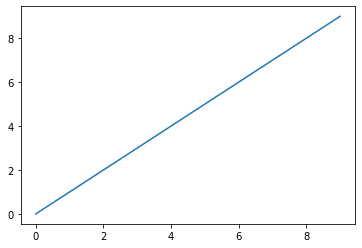

In [2]:
# test 
trialData = range(10)
plt.plot(trialData);

In [3]:
# import the cas sales dataset
car_sales = pd.read_csv('../data/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [4]:
# Note that the Price is still in String format thus it willnot be considered as value
# thus we need to change it to int or float 
# first we remove non digits characters frotmthe column price
car_sales['Price'] = car_sales['Price'].str.replace('\D','', regex=True).astype(int)/100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [5]:
# let's make a new column for total sales:
car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales
0,Toyota,White,150043,4,4000.0,4000.0
1,Honda,Red,87899,4,5000.0,9000.0
2,Toyota,Blue,32549,3,7000.0,16000.0
3,BMW,Black,11179,5,22000.0,38000.0
4,Nissan,White,213095,4,3500.0,41500.0
5,Toyota,Green,99213,4,4500.0,46000.0
6,Honda,Blue,45698,4,7500.0,53500.0
7,Honda,Blue,54738,4,7000.0,60500.0
8,Toyota,White,60000,4,6250.0,66750.0
9,Nissan,White,31600,4,9700.0,76450.0


In [6]:
# let's simulate this as date of sales
car_sales["Sale Date"] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000.0,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,9000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,16000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,38000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,41500.0,2020-01-05
5,Toyota,Green,99213,4,4500.0,46000.0,2020-01-06
6,Honda,Blue,45698,4,7500.0,53500.0,2020-01-07
7,Honda,Blue,54738,4,7000.0,60500.0,2020-01-08
8,Toyota,White,60000,4,6250.0,66750.0,2020-01-09
9,Nissan,White,31600,4,9700.0,76450.0,2020-01-10


### Now to make plot on pandas data frame we can just address the data frame to plot function 
Note: as long as we already import matplotlib.pyplot. 
Thus we can just call it just like making other plot 

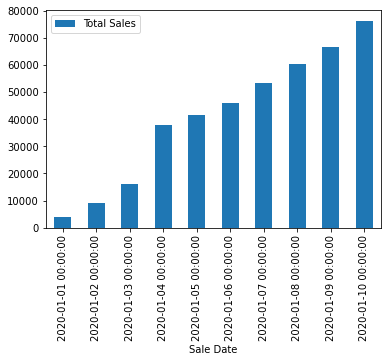

In [7]:
# now let's try to plot sale date as x axis and total sales as y axis
car_sales.plot(x='Sale Date', y='Total Sales', kind='bar');

#### pandas.dataframe.plot() function => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

 DataFrame.plot(*args, **kwargs)[source]

    Make plots of Series or DataFrame.

    Uses the backend specified by the option plotting.backend. By default, matplotlib is used.

    Parameters

        dataSeries or DataFrame

         x   The object for which the method is called.
        xlabel or position, default None

          y Only used if data is a DataFrame.
        ylabel, position or list of label, positions, default None

            Allows plotting of one column versus another. Only used if data is a DataFrame.
        kindstr

            The kind of plot to produce:

                ‘line’ : line plot (default)

                ‘bar’ : vertical bar plot
                
                'barh' : horizontal bar'

### Now let's try to make car sales odometer and price in scatter type chart


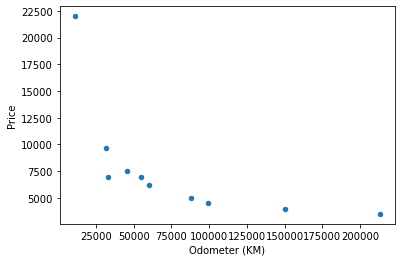

In [8]:
car_sales.plot(x='Odometer (KM)', y='Price', kind="scatter");

### SESSION 88: Plotting from Pandas DataFrames

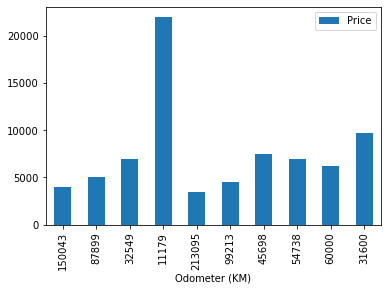

In [9]:
car_sales.plot(x='Odometer (KM)', y='Price', kind="bar");

#### WARNING: SEE HOW THE BAR AND SCATTER SEEMS NOT IN SYNC TO THE DATA?

This is not a mistake!! This is because scatter will have axes of values in the same interval starts from 0 to min or max!!

Meanwhile the Bar chart does not have this, Bar chart will just plot in accordance how the data is written in the dataframe.

We can do similar but that means we need to make the dataframe sort according to the odometer KM ascending.

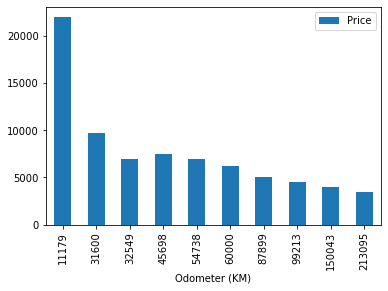

In [10]:
# Here the example on how to make the bar chart more like scatter 
# after sorting the car_sales dataframe according to Odomenter (KM)
car_sales.sort_values(by="Odometer (KM)").plot(x='Odometer (KM)', y='Price', kind="bar");

### BAR
1. concept
1. DataFrame

In [11]:
# let's make random data.
# we make random numbers array with shape (10,4)
data_random = np.random.rand(10,4)
data_random

array([[8.02677046e-01, 6.08531408e-01, 8.70688775e-01, 4.37169609e-02],
       [7.59382268e-01, 7.37559440e-01, 5.07165700e-01, 5.80089495e-01],
       [1.78638076e-01, 8.75249721e-01, 8.75897079e-01, 3.49265581e-01],
       [6.89811054e-01, 3.84461156e-01, 9.29893346e-01, 6.45470321e-01],
       [3.30192897e-01, 9.94158310e-01, 9.68699071e-01, 8.15716846e-01],
       [4.50595993e-02, 3.20422596e-01, 9.45950320e-01, 4.62267025e-01],
       [3.39700161e-01, 9.47195967e-02, 1.73631178e-02, 8.00010212e-04],
       [3.91209131e-01, 2.53631876e-01, 7.55389444e-01, 4.93733286e-01],
       [5.39173974e-01, 4.39335467e-01, 8.36801344e-01, 6.42407057e-01],
       [3.18227667e-01, 3.59954946e-01, 3.55038857e-01, 6.10894550e-01]])

In [12]:
# transform it into dataframe using pandas
df_random = pd.DataFrame(data_random, columns=['a', 'b','c','d'])
df_random

,a,b,c,d
0,0.802677,0.608531,0.870689,0.043717
1,0.759382,0.737559,0.507166,0.580089
2,0.178638,0.875250,0.875897,0.349266
3,0.689811,0.384461,0.929893,0.645470
4,0.330193,0.994158,0.968699,0.815717
5,0.045060,0.320423,0.945950,0.462267
6,0.339700,0.094720,0.017363,0.000800
7,0.391209,0.253632,0.755389,0.493733
8,0.539174,0.439335,0.836801,0.642407
9,0.318228,0.359955,0.355039,0.610895


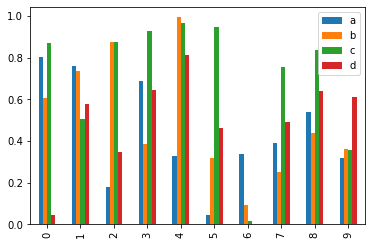

In [13]:
#  DataFrame.plot(*args, **kwargs)[source]

#     Make plots of Series or DataFrame.

#     Uses the backend specified by the option plotting.backend. By default, matplotlib is used.

#     Parameters

#         dataSeries or DataFrame

#             The object for which the method is called.
#         xlabel or position, default None

#             Only used if data is a DataFrame.
#         ylabel, position or list of label, positions, default None

#             Allows plotting of one column versus another. Only used if data is a DataFrame.
#         kindstr
df_random.plot(kind='bar');

In [14]:
## Now we make bar chart with existing data frame car sales
## this time we will set x axis to Make
## and y axis to Odometer (KM)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000.0,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,9000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,16000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,38000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,41500.0,2020-01-05
5,Toyota,Green,99213,4,4500.0,46000.0,2020-01-06
6,Honda,Blue,45698,4,7500.0,53500.0,2020-01-07
7,Honda,Blue,54738,4,7000.0,60500.0,2020-01-08
8,Toyota,White,60000,4,6250.0,66750.0,2020-01-09
9,Nissan,White,31600,4,9700.0,76450.0,2020-01-10


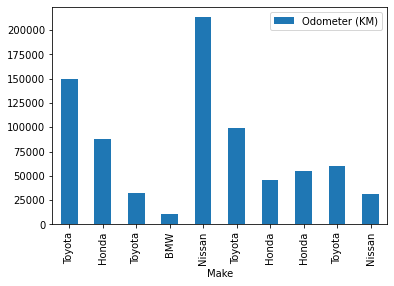

In [15]:
# pandas.DataFrame.plot
car_sales.plot(kind='bar', x='Make', y='Odometer (KM)');

#### NOTE:
I tend to make mistakes of not using ';' in the end of Matplotlib and Pandas plot function.

**REMEMBER** : THE ';' MAKES THE PLOT RESULT NON ADDRESS ARRAY 

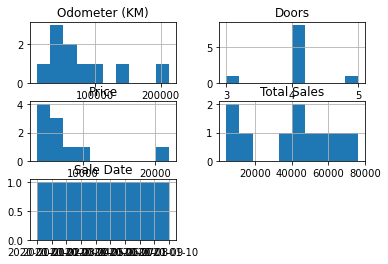

In [16]:
# Histogram
# let's make histogram for Odometer (KM)
# This is different than making plot from other dataframe
# pandas.DataFrame.hist link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
car_sales.hist();

#### NOTE:
This is too much data right? Well this is because we make histogram of all data in car_sales. I need to be more specific!

I need the histogram of the Odometer(KM). Remember car_sales['Odometer(KM)'] is also dataFrame as part of larger car_sales dataframe.

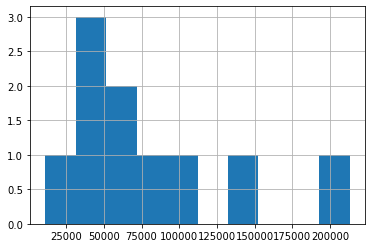

In [17]:
# we make specific histrogram for car_sales' Odometer (KM)
car_sales['Odometer (KM)'].hist();

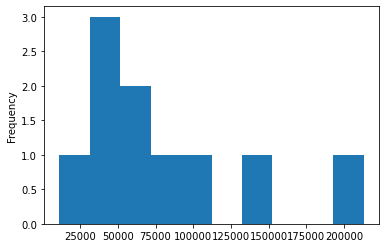

In [18]:
# use the alternative using plot.hist()
car_sales['Odometer (KM)'].plot.hist();

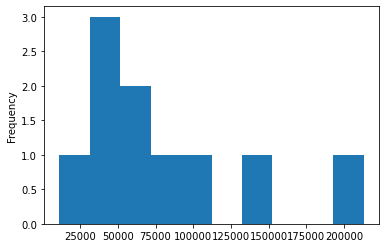

In [19]:
# this is another format of plot histogram.
car_sales['Odometer (KM)'].plot(kind='hist');

#### NOTE:
The dataFrame.hist() result's has grid by default, the plot on both method plot.hist() and plot(kind='hist') will result plain plot. This can have grid is set by the ax (axis) properties.

But what is the different between plot.hist() vs plot(kind='hist')?

Well here hist function have further setting related specific to histogram. The most notable is bins. Which set the number of histogram bars. This also available when using the dataFrame.hist() directly not using plot module.

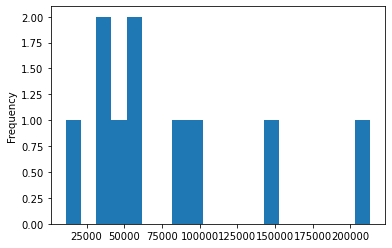

In [20]:
# Make Odometer histogram with different bins
car_sales['Odometer (KM)'].plot.hist(bins=20);

### SESSION 89: Plotting from Pandas DataFrame 3
#### WE USE NEW DATA FRAME HEART DESEASE
heart desease have many Rows thus it will a good test on the Pandas and plot to process the whole data frame

In [21]:
## Import the dataFrame
heart_disease = pd.read_csv('../data/heart-disease.csv')

## now let's confirm the read is success.
# but since the data is so big we will inspect the head of the dataFrame.
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Note:
This is the dataFrame with many columns. If we directly use heart_disease.hist() it will be too much

We will focus on one data column. From the head of the dataFrame looks like the most spreaded data is age.

Let's see the histogram of the age in heart_disease dataFrame.

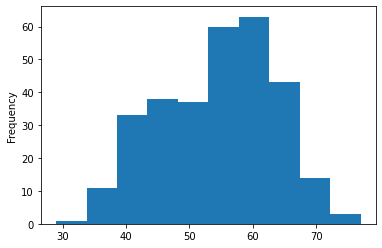

In [22]:
## making histogram for heart_desease age samples.
heart_disease['age'].plot.hist();

#### NOTE:
This is the histogram using the standard bins = 10. 

bins is the number of bar in the histogram in respect of the whole data range.

bins = (max value - min value)/bin_width.
Thus as we set the number of bins (bins) then the width of each bin = bin_width = (max value - min value)/bins

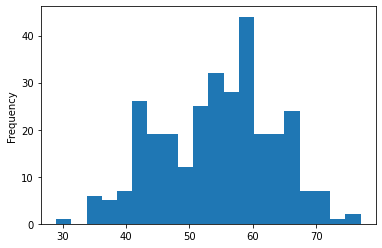

In [23]:
## now compare with larger bins
## in this case we choose the bins= 20
heart_disease['age'].plot.hist(bins=20);

#### NOTE:
the larger we set bins then the descrioption of data distributin is getting more details. But too large setting the bins it will also make the data description vague. 

In this case bins default = 10 make the probability distribution clearer as the mean leaning towards max value. 

Compared to the bins=20 which the mean still areound 60 but the distribution is more vague toward which way they lean.

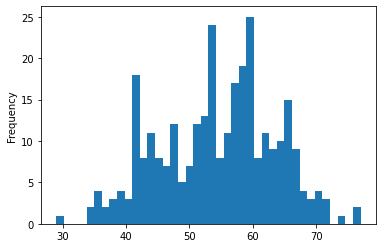

In [24]:
# Compare this to bins = 40
heart_disease['age'].plot.hist(bins=40);

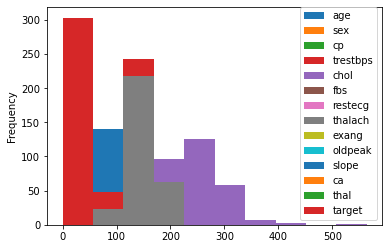

In [25]:
## let's make all column in heart_disease in histograms.
heart_disease.plot.hist();

#### NOTE: 
This becoming confusing that all histogram are plugged in the same chart...
I need to make it better

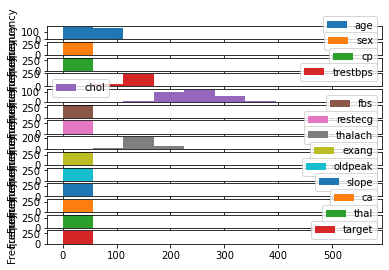

In [26]:
heart_disease.plot.hist(subplots=True);

#### NOTE:
Not really readable, maybe I need to make or set fig size to make it larger.

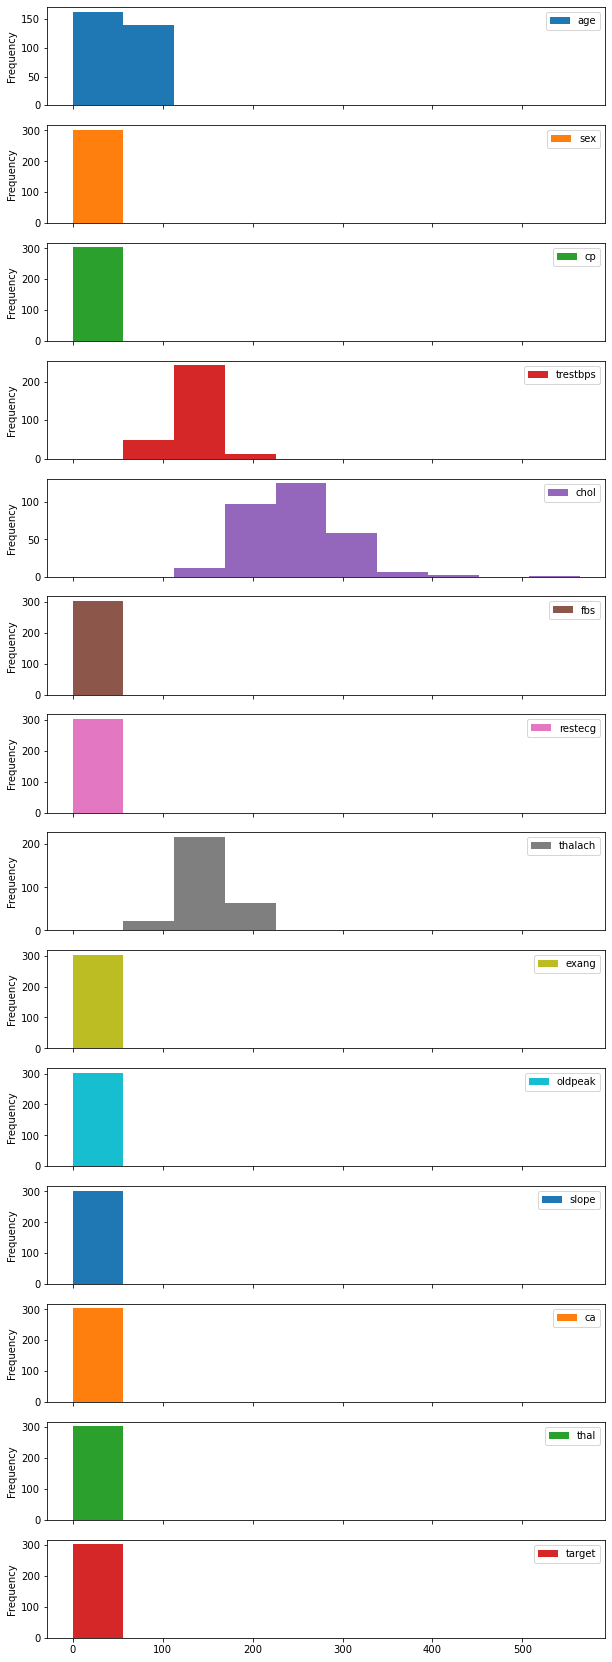

In [27]:
## use figsize method
heart_disease.plot.hist(subplots=True, figsize=(10,30));

#### NOTE:
Much better but the scales are still weird since all data still uses the same scale when depicted in the histogram. 

I need better tool for this. 

Maybe it is time to use the OBJECT ORIENTED methods of MATPLOTLIB

YEAH SO FAR WE ONLY USES THE STATIC VERSION OF MATPLOTLIB THAT IS INTEGRATED TO THE PANDAS LIBS

### SESSION 90: Plotting from Pandas DataFrames 5
We will use the OBJECT ORIENTED methid to make better histogram chart for heart_disease data.

Which one? pyplot vs MATPLOTLIB OO method???
pyplot is quicker since embedded in many other libs such as pandas.

Plotting more advace use the OO method!! 
OO method will offers more versatilities?

#### NOTE:
We want to filter to the age above 50

In [28]:
age_over_50_check = heart_disease['age'] > 50
age_over_50_check.head()

0     True
1    False
2    False
3     True
4     True
Name: age, dtype: bool

#### NOTE:
what's going on here???

Looks like I only return thr result of the boolean heart_disease['age'] > 50 not the actual data!!!

To fix this we need to sort not calculate!!


In [29]:
### sort the heart disease data for age > 50
age_over_50 = heart_disease[heart_disease['age']>50]
age_over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [30]:
## we can use different method since we already have boolean check from before
age_over_50 = heart_disease[age_over_50_check]
age_over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


#### NOTE:
Both inputs on two rows above are valid since the age_over_50_check returns boolean validating if heart_desease['age] > 50

Let's use this as model on how to make filters to the data..

#### WHAT'S NEXT:
Well now let's see the static version of the MATPLOTLIB in action first 

We want to plot the chol level of the respondents with age above 50 and the target whether they have heart disease or not.

<AxesSubplot:xlabel='age', ylabel='chol'>

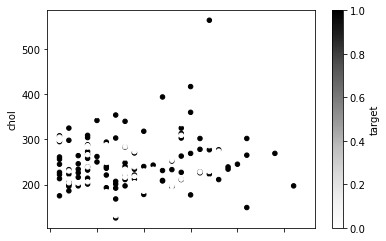

In [31]:
## plotting form age_over_50 on chol using scatter and confirm target
age_over_50.plot(kind='scatter',
                x='age',
                y='chol',
                c='target')

#### NOTE: 
c here means color and target is the name of one of the column in age_over_50 dataFrame. the color here will be differentiatated according to the target value which has only 1 or 0 value thus one extreme is 1 and the other is 0

#### WHAT'S NEXT
Well it is obvious we want to try using the OO MATPLOTLIB method to make similar chart

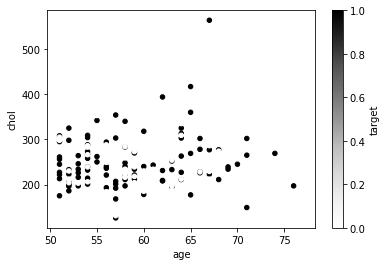

In [32]:
## initiate the object oriented methods of matplotlib
## use the plt alias for matplotlib
fig, ax = plt.subplots();

## plot the same from dataFrame but this time it needs to address that axes will conform to the ax object behaviors.
age_over_50.plot(kind='scatter',
                x='age',
                y='chol',
                c='target',
                ax=ax);

#### NOTE:
Okay no different... but this is because we have not give any OO style attributes and behavior since we have not give any parameters let alone arguments to it.

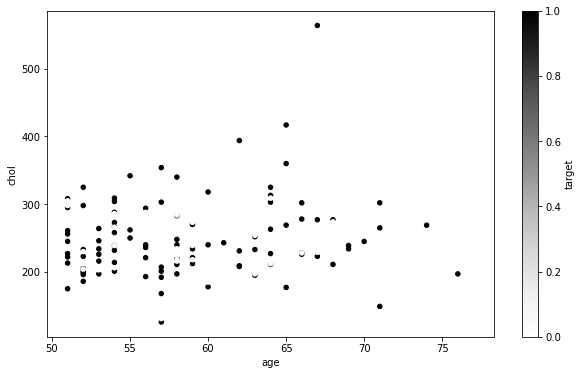

In [33]:
## initiate the object oriented methods of matplotlib
## use the plt alias for matplotlib
fig, ax = plt.subplots(figsize=(10,6));

## plot the same from dataFrame but this time it needs to address that axes will conform to the ax object behaviors.
age_over_50.plot(kind='scatter',
                x='age',
                y='chol',
                c='target',
                ax=ax);

#### NOTE:
This is only simple figsize parameter that can change and it is not even axis parameters. But as you can see it already have impact on how the chart is looks like.

INDEED we still call the figsize parameter method from the static version of matplotlib as we done this before but the resutl will omit the scale axis labels.

#### WHAT'S NEXT
We will access to manipulate axes on chart area

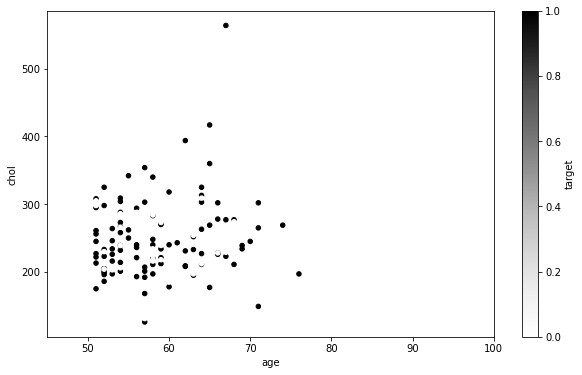

In [34]:
## initiate the object oriented methods of matplotlib
## use the plt alias for matplotlib
fig, ax = plt.subplots(figsize=(10,6));

## plot the same from dataFrame but this time it needs to address that axes will conform to the ax object behaviors.
age_over_50.plot(kind='scatter',
                x='age',
                y='chol',
                c='target',
                ax=ax);
ax.set_xlim([45,100]);

#### NOTE:
we use the ax object and set the x axis to limit its value from 45 to 100 instead of 50 to 75 from the previous chart

#### CAUTION
I cannot just put ax.set_xlim() method on the new line command and hope the chart will reappear on modified version. I need to redo the whole command (or just copy paste it in my case) to the new line and the modified chart then reappear.

### SESSION 91: Plotting from Pandas DataFrames 6
Here we will make more compelling chart of the age (above 50) with cholestrol level and which has heart disease and which are not.

Hare we will describe the real power of the OO methods of matplotlib.

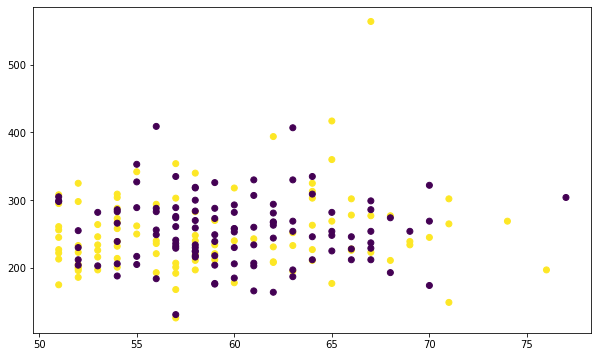

In [35]:
# initiate the figure and axes object:
fig_over_50, ax_over_50 = plt.subplots(figsize=(10,6))

# now we create the scatter object that will be the chart of our data
## docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
scatter_chart = ax_over_50.scatter(x=age_over_50['age'],
                                   y=age_over_50['chol'],
                                   c=age_over_50['target']);

### NOTE:
To find the documentation for the Object Oriented methods of the Matplotlib you need to be very precise. If you just search using keyword like 'matplotlib scatter' chances are you will end up in the static version. 

However, if you use 'matplotlib axes scatter' you most likely will ended up in the docs for the OO method version such as this [documentation of making scatter from axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

#### WHAT'S NEXT
We need to make the title, axis label, and legend to make the chart more informative and useful with context.

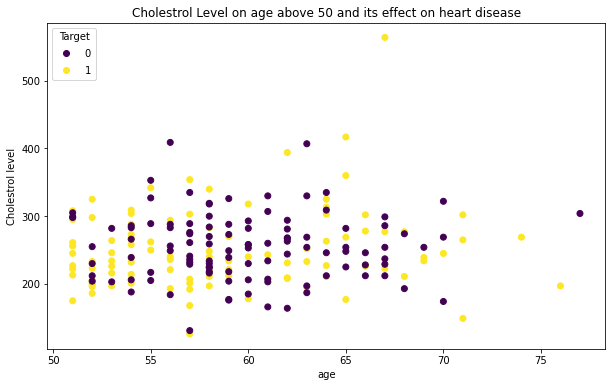

In [36]:
# initiate the figure and axes object:
fig_over_50, ax_over_50 = plt.subplots(figsize=(10,6))

# now we create the scatter object that will be the chart of our data
## docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
scatter_chart = ax_over_50.scatter(x=age_over_50['age'],
                                   y=age_over_50['chol'],
                                   c=age_over_50['target']);

# add x axis label: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax_over_50.set_xlabel("age");

# add y axis label:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
ax_over_50.set_ylabel("Cholestrol level");

# add title 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
ax_over_50.set_title("Cholestrol Level on age above 50 and its effect on heart disease");

# add legend
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
# this is a bit hard since this involving *args and **kwargs
# let's try the auto legend method:
# ax_over_50.legend();
# this produce an error : No handles with labels found to put in legend.

# Looks like we cannot just use the legend method since there are no handles with labels found to put as legend
# search: axes scatter legend
# found: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html#automated-legend-creation
ax_over_50.legend(*scatter_chart.legend_elements(), title="Target", loc="upper left");

#### NOTE:
This is the more informative version of the chart. Please pay attention to the process of developing the chart above. In order to search the suitable methods to produce the chart we wanted we need to be precise in keywords when dealing with Matplotlib!!

For instance the legend part here. Using the standard method even this is the Axes.label in the OO method docs it still does not work. Thus I decided to search for more specific keyword: axes scatter legend and found this [documentation on Automated Legend Creation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html#automated-legend-creation).

#### WHAT'S NEXT
We make a mean of the data and put it as horizontal line on the scatter chart. This means the mean must be the Cholestrol data.

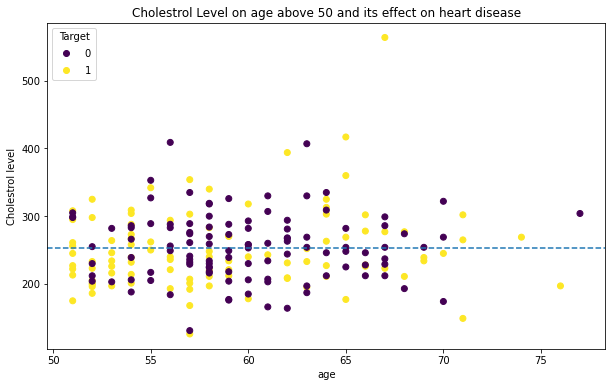

In [37]:
# we copy paste the chart and omitted some info. for more info look at the command line above this line
# initiate the figure and axes object:
fig_over_50, ax_over_50 = plt.subplots(figsize=(10,6))

# now we create the scatter object that will be the chart of our data
scatter_chart = ax_over_50.scatter(x=age_over_50['age'],
                                   y=age_over_50['chol'],
                                   c=age_over_50['target']);

# add x axis label: 
ax_over_50.set_xlabel("age");

# add y axis label:
ax_over_50.set_ylabel("Cholestrol level");

# add title 
ax_over_50.set_title("Cholestrol Level on age above 50 and its effect on heart disease");

# add legend
ax_over_50.legend(*scatter_chart.legend_elements(), title="Target", loc="upper left");

# add  mean data of the cholestrol as horizontal line in scatter plot
# search: matplotlib axes hosrizontal line
# docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html

## first we need to find the y position of the horizontal line which is the mean of chol column in age_over_50 data frame
# docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
chol_mean_over_50 = age_over_50['chol'].mean()

# the default horizontal line is solid line, I want to change it using the keyword arguments (kwargs) parameter linestyle
ax_over_50.axhline(chol_mean_over_50, linestyle='--');

### NOTE:
This is the more interactive of the OO method from matplotlib. Make the chart more informative and versatile to costumize. One must remember to be specific and in details when referring to the OO methods by quoting axes on the search keyword.

### SESSION 92: Plotting from Pandas DataFrames 6
We will make multiple axes in one figure this time. The one axes we will use the existing data from age vs cholestrol, and the other is new plot age vs thalach (or heart rate).

As we see there are similar variable used as axes which is age. Thus we can use this as shared axes. As the age in previous plot is used as x axes then we will make the x axes shared. 

Shared here means both plot will have the same x axes scales and plot style.

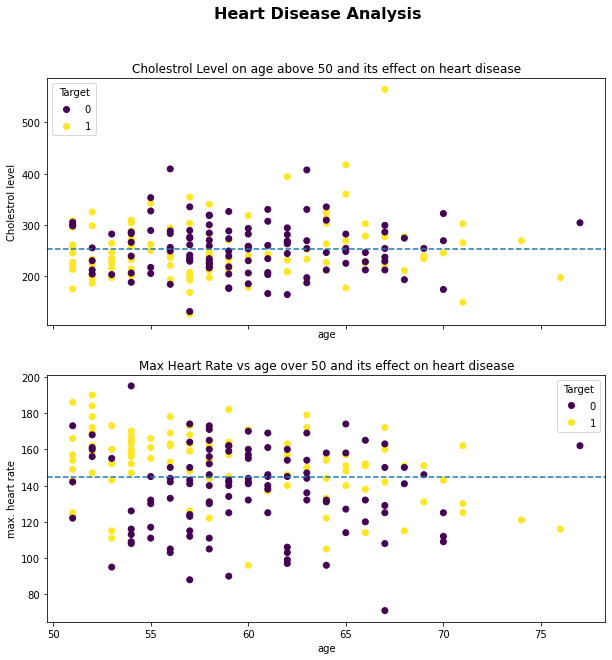

In [38]:
# set plot(we make 2 rows as we will use shared x axes)
#  docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig_over_50_2, (ax_chol_over_50, ax_thalach_over_50) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10));
# additional docs: for **fig_kw (figure keyword arguments) figsize: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#  I choose figsize 10 x 10 in since the height of the fig will be twice since there are two data plotted. 

# we begin with the chol_over_50 data frame first:
# since this is already being presented should be easier and some info will be ommitted if you want more info on the docs
# you can see the lines above.
# create scatter chart for ax_chol_over_50
chol_over_50_chart = ax_chol_over_50.scatter(x=age_over_50['age'],
                                             y=age_over_50['chol'],
                                             c=age_over_50['target']);
# add x axis label: 
ax_chol_over_50.set_xlabel("age");

# add y axis label:
ax_chol_over_50.set_ylabel("Cholestrol level");

# add title 
ax_chol_over_50.set_title("Cholestrol Level on age above 50 and its effect on heart disease");

# add legend
ax_chol_over_50.legend(*chol_over_50_chart.legend_elements(), title="Target", loc="upper left");

# add  mean data of the cholestrol as horizontal line in scatter plot
chol_mean_over_50 = age_over_50['chol'].mean()

# the default horizontal line is solid line, I want to change it using the keyword arguments (kwargs) parameter linestyle
ax_chol_over_50.axhline(chol_mean_over_50, linestyle='--');

# now for the ax_thalach we can repeat the same prcess but for ax_thalach_over_50 and use age_over_50['thalach'] dataframe.
thalach_over_50_chart = ax_thalach_over_50.scatter(x=age_over_50['age'],
                                                   y=age_over_50['thalach'],
                                                   c=age_over_50['target']);
# add x axis label
ax_thalach_over_50.set_xlabel("age");

# add y axis label
ax_thalach_over_50.set_ylabel("max. heart rate");

# add title
ax_thalach_over_50.set_title("Max Heart Rate vs age over 50 and its effect on heart disease");

# add legend
ax_thalach_over_50.legend(*thalach_over_50_chart.legend_elements(), title="Target");

# mean data thalach over 50
thalach_mean_over_50 = age_over_50['thalach'].mean()

# add horizontal line to the mean with format '--'
ax_thalach_over_50.axhline(thalach_mean_over_50, linestyle="--");

# Well we will also have super title of the figure
# docs : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
# docs API: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.FigureBase.suptitle
fig_over_50_2.suptitle("Heart Disease Analysis", fontweight='bold', fontsize=16);

## 5. Customizing your plots
limits (xlim, ylim), colors, styles, legends

In [39]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Note: 
This is all tha available default styles that can be used to decorate the matplotlib plots.

#### WARNING: 
I will use the default styles to the heart disease chart above thus I need to copy it an paste it to the below 

Then I need to set the plt.style.use() to make the style with the heart disease chart

In [40]:
plt.style.use('seaborn-whitegrid')

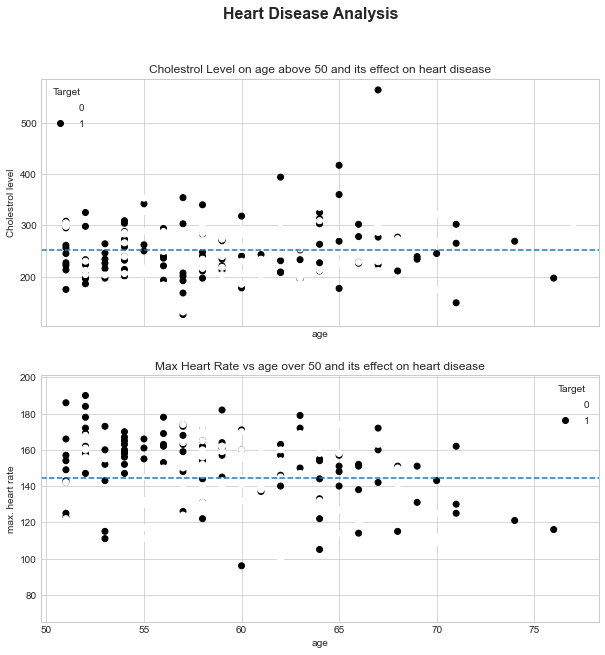

In [41]:
# set plot(we make 2 rows as we will use shared x axes)
#  docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig_over_50_2, (ax_chol_over_50, ax_thalach_over_50) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10));
# additional docs: for **fig_kw (figure keyword arguments) figsize: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#  I choose figsize 10 x 10 in since the height of the fig will be twice since there are two data plotted. 

# we begin with the chol_over_50 data frame first:
# since this is already being presented should be easier and some info will be ommitted if you want more info on the docs
# you can see the lines above.
# create scatter chart for ax_chol_over_50
chol_over_50_chart = ax_chol_over_50.scatter(x=age_over_50['age'],
                                             y=age_over_50['chol'],
                                             c=age_over_50['target']);
# add x axis label: 
ax_chol_over_50.set_xlabel("age");

# add y axis label:
ax_chol_over_50.set_ylabel("Cholestrol level");

# add title 
ax_chol_over_50.set_title("Cholestrol Level on age above 50 and its effect on heart disease");

# add legend
ax_chol_over_50.legend(*chol_over_50_chart.legend_elements(), title="Target", loc="upper left");

# add  mean data of the cholestrol as horizontal line in scatter plot
chol_mean_over_50 = age_over_50['chol'].mean()

# the default horizontal line is solid line, I want to change it using the keyword arguments (kwargs) parameter linestyle
ax_chol_over_50.axhline(chol_mean_over_50, linestyle='--');

# now for the ax_thalach we can repeat the same prcess but for ax_thalach_over_50 and use age_over_50['thalach'] dataframe.
thalach_over_50_chart = ax_thalach_over_50.scatter(x=age_over_50['age'],
                                                   y=age_over_50['thalach'],
                                                   c=age_over_50['target']);
# add x axis label
ax_thalach_over_50.set_xlabel("age");

# add y axis label
ax_thalach_over_50.set_ylabel("max. heart rate");

# add title
ax_thalach_over_50.set_title("Max Heart Rate vs age over 50 and its effect on heart disease");

# add legend
ax_thalach_over_50.legend(*thalach_over_50_chart.legend_elements(), title="Target");

# mean data thalach over 50
thalach_mean_over_50 = age_over_50['thalach'].mean()

# add horizontal line to the mean with format '--'
ax_thalach_over_50.axhline(thalach_mean_over_50, linestyle="--");

# Well we will also have super title of the figure
# docs : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
# docs API: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.FigureBase.suptitle
fig_over_50_2.suptitle("Heart Disease Analysis", fontweight='bold', fontsize=16);

### NOTES:
Now that I have make the default styel to seaborne-whitegrid then I need to give the data plot some color to give contrast. 

Now I need to make some search on what kind of color scheme for data plot is available. 

Here is the data for the color map of the plot: https://matplotlib.org/stable/tutorials/colors/colormaps.html

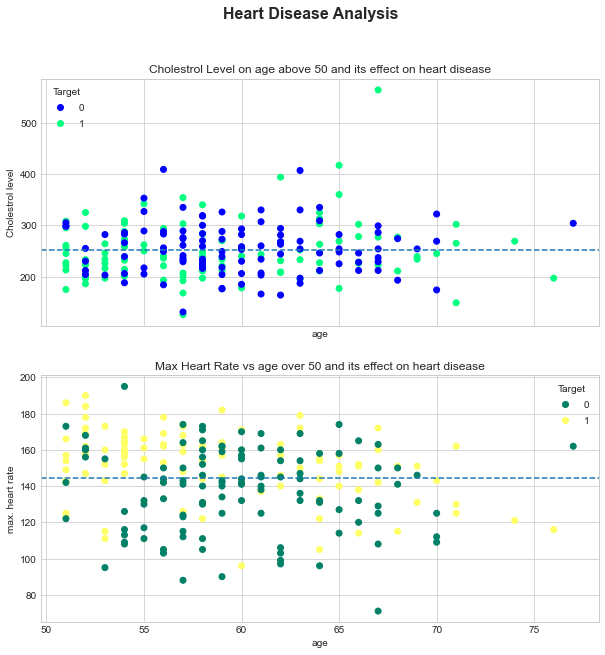

In [42]:
# set plot(we make 2 rows as we will use shared x axes)
#  docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig_over_50_2, (ax_chol_over_50, ax_thalach_over_50) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10));
# additional docs: for **fig_kw (figure keyword arguments) figsize: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#  I choose figsize 10 x 10 in since the height of the fig will be twice since there are two data plotted. 

# we begin with the chol_over_50 data frame first:
# since this is already being presented should be easier and some info will be ommitted if you want more info on the docs
# you can see the lines above.
# create scatter chart for ax_chol_over_50
chol_over_50_chart = ax_chol_over_50.scatter(x=age_over_50['age'],
                                             y=age_over_50['chol'],
                                             c=age_over_50['target'],
                                             cmap='winter'); #this is color map
# add x axis label: 
ax_chol_over_50.set_xlabel("age");

# add y axis label:
ax_chol_over_50.set_ylabel("Cholestrol level");

# add title 
ax_chol_over_50.set_title("Cholestrol Level on age above 50 and its effect on heart disease");

# add legend
ax_chol_over_50.legend(*chol_over_50_chart.legend_elements(), title="Target", loc="upper left");

# add  mean data of the cholestrol as horizontal line in scatter plot
chol_mean_over_50 = age_over_50['chol'].mean()

# the default horizontal line is solid line, I want to change it using the keyword arguments (kwargs) parameter linestyle
ax_chol_over_50.axhline(chol_mean_over_50, linestyle='--');

# now for the ax_thalach we can repeat the same prcess but for ax_thalach_over_50 and use age_over_50['thalach'] dataframe.
thalach_over_50_chart = ax_thalach_over_50.scatter(x=age_over_50['age'],
                                                   y=age_over_50['thalach'],
                                                   c=age_over_50['target'],
                                                   cmap='summer'); #this is color map
# add x axis label
ax_thalach_over_50.set_xlabel("age");

# add y axis label
ax_thalach_over_50.set_ylabel("max. heart rate");

# add title
ax_thalach_over_50.set_title("Max Heart Rate vs age over 50 and its effect on heart disease");

# add legend
ax_thalach_over_50.legend(*thalach_over_50_chart.legend_elements(), title="Target");

# mean data thalach over 50
thalach_mean_over_50 = age_over_50['thalach'].mean()

# add horizontal line to the mean with format '--'
ax_thalach_over_50.axhline(thalach_mean_over_50, linestyle="--");

# Well we will also have super title of the figure
# docs : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
# docs API: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.FigureBase.suptitle
fig_over_50_2.suptitle("Heart Disease Analysis", fontweight='bold', fontsize=16);

### Note:
This is the demo for color map. It is located for the axes parameter in the object oriented model of matplotlib.

Then I choose two different kind of color map 'winter' for cholestrol level and 'summer' color map for max. heart rate.

### Next:
Next we have the x axis and y axis seems not on the spot. The grid is having some left overs in the minimum of x axis and maximum of y axis. I need to fix this, by setting the min and maximum for axis. 

#### Note:
both axws using shared x axes thus I can just set it once for both of them. 

For the y axes the one need to be fixed in in the max. heart rate chart and the cholestrol level chart it is already acceptable.

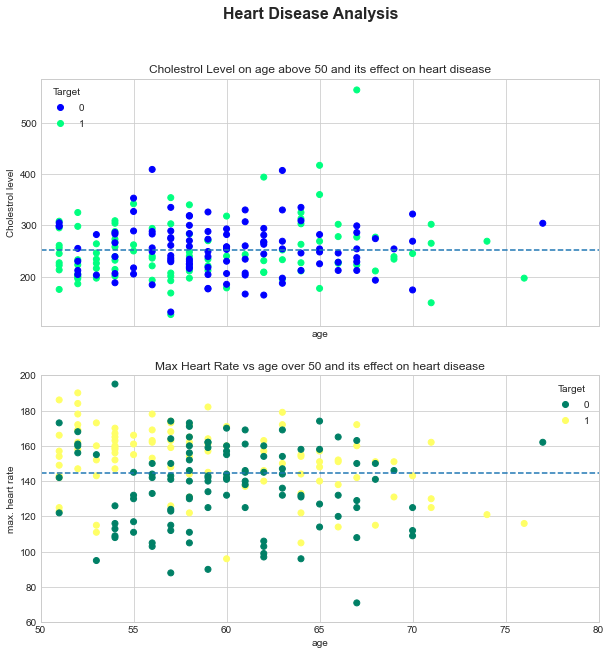

In [43]:
# set plot(we make 2 rows as we will use shared x axes)
#  docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig_over_50_2, (ax_chol_over_50, ax_thalach_over_50) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10));
# additional docs: for **fig_kw (figure keyword arguments) figsize: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#  I choose figsize 10 x 10 in since the height of the fig will be twice since there are two data plotted. 

# we begin with the chol_over_50 data frame first:
# since this is already being presented should be easier and some info will be ommitted if you want more info on the docs
# you can see the lines above.
# create scatter chart for ax_chol_over_50
chol_over_50_chart = ax_chol_over_50.scatter(x=age_over_50['age'],
                                             y=age_over_50['chol'],
                                             c=age_over_50['target'],
                                             cmap='winter'); #this is color map
# add x axis label: 
ax_chol_over_50.set_xlabel("age");

# add y axis label:
ax_chol_over_50.set_ylabel("Cholestrol level");

# add title 
ax_chol_over_50.set_title("Cholestrol Level on age above 50 and its effect on heart disease");

# add legend
ax_chol_over_50.legend(*chol_over_50_chart.legend_elements(), title="Target", loc="upper left");

# add  mean data of the cholestrol as horizontal line in scatter plot
chol_mean_over_50 = age_over_50['chol'].mean()

# the default horizontal line is solid line, I want to change it using the keyword arguments (kwargs) parameter linestyle
ax_chol_over_50.axhline(chol_mean_over_50, linestyle='--');

# set the x axes limits
ax_chol_over_50.set_xlim([50, 80])

# now for the ax_thalach we can repeat the same prcess but for ax_thalach_over_50 and use age_over_50['thalach'] dataframe.
thalach_over_50_chart = ax_thalach_over_50.scatter(x=age_over_50['age'],
                                                   y=age_over_50['thalach'],
                                                   c=age_over_50['target'],
                                                   cmap='summer'); #this is color map
# add x axis label
ax_thalach_over_50.set_xlabel("age");

# add y axis label
ax_thalach_over_50.set_ylabel("max. heart rate");

# add title
ax_thalach_over_50.set_title("Max Heart Rate vs age over 50 and its effect on heart disease");

# add legend
ax_thalach_over_50.legend(*thalach_over_50_chart.legend_elements(), title="Target");

# mean data thalach over 50
thalach_mean_over_50 = age_over_50['thalach'].mean()

# add horizontal line to the mean with format '--'
ax_thalach_over_50.axhline(thalach_mean_over_50, linestyle="--");

# set y limit just for the max herat rate chart ax_thalach_over_50
ax_thalach_over_50.set_ylim([60, 200])

# Well we will also have super title of the figure
# docs : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
# docs API: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.FigureBase.suptitle
fig_over_50_2.suptitle("Heart Disease Analysis", fontweight='bold', fontsize=16);

## 6. Saving figures
Here we will save the figures we just created on heart disease to be edited further or just used in the presentation slides.

First we need to see what file extension available for saving the figure image.

In [44]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### Note:
These are the file types available for saving the figure. now let see which figure we want to save


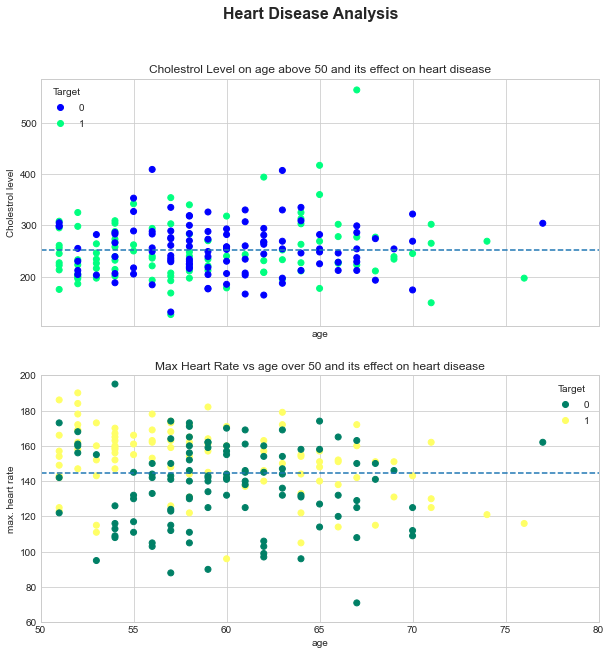

In [45]:
fig_over_50_2

#### NEXT:
I want to save this image to the image folder but with different name in case the previous owner already have their heart disease chart saved in the image folder also.


In [46]:
fig_over_50_2.savefig("../images/heart-disease-data2.png")